# NGC 188 Assignment - Nicole DePergola

## Refined Search

#### Using constraints found in previous search

### Parameters

In [2]:
import matplotlib.pyplot as plt
import astropy
from astroquery.gaia import Gaia
import numpy as np
from astropy.modeling import models, fitting
fitter = fitting.LevMarLSQFitter()
from astropy.table import Table, vstack
from scipy.stats import norm
from scipy import integrate
import matplotlib.mlab as mlab
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.modeling.models import custom_model
from astropy.modeling import Fittable1DModel, Parameter
from astroquery.sdss import SDSS
import math


# zooming in on cluster to make our lives easier
query_box_zoomed = """SELECT 
{columns}
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(
  POINT(ra, dec),
  BOX(11.97, 85.24083, 3.61699411, 0.3000936947846532))
"""
# ra span found by dec_span divided by cosine of center declination

columns = 'source_id, ra, dec, pmra, pmdec, parallax'

query = query_box_zoomed.format(columns=columns)

job = Gaia.launch_job_async(query=query)

results_zoomed = job.get_results()


ra = results_zoomed['ra']
dec = results_zoomed['dec']
parallax = results_zoomed['parallax']
pmra = results_zoomed['pmra']
pmdec = results_zoomed['pmdec']


INFO: Query finished. [astroquery.utils.tap.core]


In [3]:
results_zoomed

SOURCE_ID,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
573748772513933184,13.482581246066726,85.10194392668213,2.711670958186124,3.3233921673444766,1.3269001607299633
573748776810535808,13.540355367862732,85.10324361443429,0.017498319354742664,1.7947360931540974,0.2561727724485855
573748776810535936,13.558883102225808,85.09554095241272,-4.777296544948063,1.0666385555461757,0.39859110422845795
573749081751581184,13.691000822134791,85.10570528562205,2.3587222505663714,1.5674384966469663,0.8022828479074489
573749086047266688,13.677901438808531,85.10237150762553,--,--,--
573749086047605760,13.669940347530973,85.10660019338751,-3.7108453192855193,0.07651299309314069,0.8636104273789876
573749116111325824,13.714722105030352,85.11896919492233,-2.0215191336316694,1.2768926136377972,0.363836007048032
573749120407004800,13.688096410235987,85.1113061462748,7.683044890651358,2.2972202621420776,0.060128604900531527


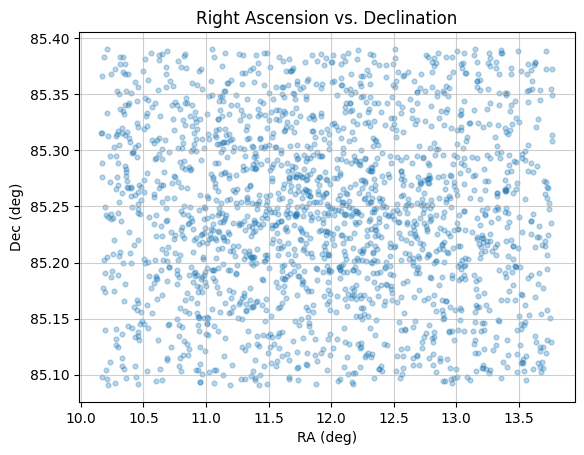

In [4]:
%matplotlib inline

plt.figure()
plt.scatter(ra, dec,  alpha=0.3, s=12)
plt.title("Right Ascension vs. Declination")
plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)")
plt.grid(alpha=0.6)


## Plots

### Right Ascension

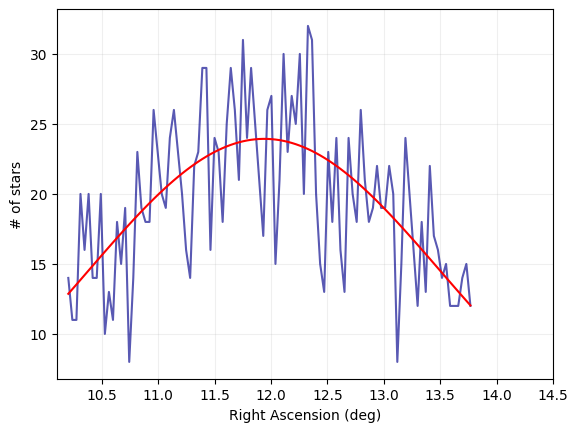

In [5]:
hist, bins = np.histogram(ra, bins=100, range=None, normed=None, weights=None, density=None)
bins = bins[1:]


gauss_model = models.Gaussian1D(amplitude=5, mean=12, stddev=.1)
#poly10 = models.Polynomial1D(degree=2)

combined_model_ra = gauss_model

model_ra = fitter(combined_model_ra, bins, hist)

#%matplotlib widget
plt.figure()
plt.plot(bins, hist, color='darkblue', alpha=0.65)
plt.plot(bins, model_ra(bins), 'r')
plt.xlim(10.1, 14.5)
plt.ylabel("# of stars")
plt.xlabel("Right Ascension (deg)")
plt.grid(alpha=0.2)

In [6]:
print(model_ra, "\n")

cov_ra = fitter.fit_info['param_cov']
err_ra = dict(zip(model_ra.param_names, np.diag(cov_ra)**0.5))
print("Uncertainties: ", err_ra)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean             stddev      
    ------------------ ----------------- ------------------
    23.933048173802785 11.93944843004909 1.5601602365977179 

Uncertainties:  {'amplitude': 0.7089334275879832, 'mean': 0.061368455067816664, 'stddev': 0.10141796352350266}


In [7]:
FWHM_ra = 2.355 * 1.5702952211613468 * 3
FWHM_ra_arcmin = FWHM_ra*60
print('Size of NGC 188 in right ascension: {:0.5f} arcminutes'.format(FWHM_ra_arcmin))
print('RA very streched.')

Size of NGC 188 in right ascension: 665.64814 arcminutes
RA very streched.


In [8]:
FWHM_ra

11.094135737504914

### Declination

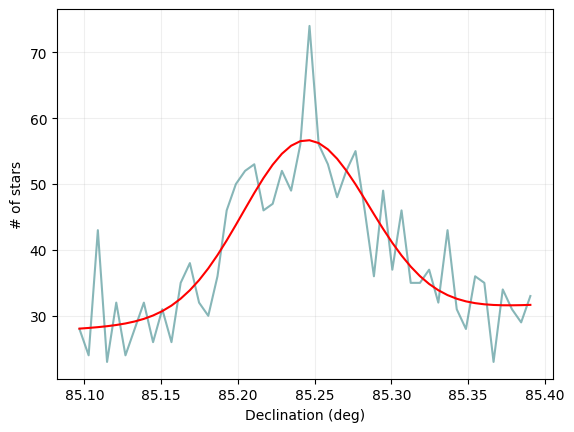

In [9]:

hist, bins = np.histogram(dec, bins=50, range=None, normed=None, weights=None, density=None)
bins = bins[1:]


gauss_model = models.Gaussian1D(amplitude=3, mean=85.27, stddev=.03)
poly10 = models.Polynomial1D(degree=1)

combined_model_dec = gauss_model + poly10

model_dec = fitter(combined_model_dec, bins, hist, maxiter=10000)

#%matplotlib widget
plt.figure()
plt.plot(bins, hist, color='cadetblue', alpha=0.75)
plt.plot(bins, model_dec(bins), 'r')
plt.ylabel("# of stars")
plt.xlabel("Declination (deg)")
plt.grid(alpha=0.2)

In [10]:
print(model_dec[0])
print(model_dec[1], "\n")

cov_dec = fitter.fit_info['param_cov']
err_dec = dict(zip(model_dec.param_names, np.diag(cov_dec)**0.5))
print("Uncertainties: ", err_dec)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev       
    ------------------ ----------------- --------------------
    26.842551908274476 85.24436708530467 0.041228694098530055
Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 1
Parameters:
             c0                 c1        
    ------------------- ------------------
    -1014.1652687891074 12.246941172045835 

Uncertainties:  {'amplitude_0': 2.3201697000187282, 'mean_0': 0.004119109884052173, 'stddev_0': 0.004912945679493051, 'c0_1': 907.944989126956, 'c1_1': 10.651378064043975}


In [11]:
FWHM_dec = 2.355 * 0.04007517299469334 * 3
FWHM_dec_arcmin = FWHM_dec*60
print('Size of NGC 188 in declination: {:0.5f} arcminutes'.format(FWHM_dec_arcmin))

Size of NGC 188 in declination: 16.98787 arcminutes


In [12]:
FWHM_dec

0.28313109720750845

In [13]:
cov_dec

array([[ 5.38318744e+00,  1.41807248e-03, -6.08470182e-04,
         1.60193607e+02, -1.89940906e+00],
       [ 1.41807248e-03,  1.69670662e-05, -1.99010483e-06,
         1.77951561e+00, -2.08761171e-02],
       [-6.08470182e-04, -1.99010483e-06,  2.41370352e-05,
        -1.76109040e-01,  2.00511856e-03],
       [ 1.60193607e+02,  1.77951561e+00, -1.76109040e-01,
         8.24364103e+05, -9.67085122e+03],
       [-1.89940906e+00, -2.08761171e-02,  2.00511856e-03,
        -9.67085122e+03,  1.13451855e+02]])

### Parallax

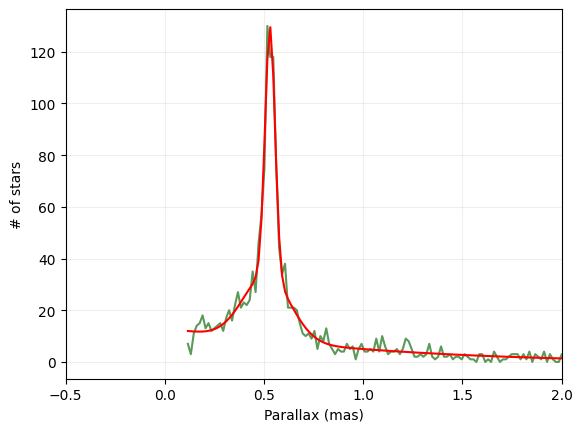

In [12]:
parallax = parallax[~np.isnan(parallax)]
parallax = parallax[parallax>0.1]

hist, bins = np.histogram(parallax, bins=500, range=None, normed=None, weights=None, density=None)
bins = bins[1:]


gauss_model = models.Gaussian1D(amplitude=110, mean=.54, stddev=.07)
gauss_model2 = models.Gaussian1D(amplitude=115, mean=.42, stddev=.32)
gauss_model3 = models.Gaussian1D(amplitude=30, mean=1.2, stddev=.1)

combined_model_plx = gauss_model + gauss_model2 + gauss_model3

model_plx = fitter(combined_model_plx, bins, hist, maxiter=10000)

#%matplotlib inline
plt.figure()
plt.plot(bins, hist, color='darkgreen', alpha=0.65)
plt.plot(bins, model_plx(bins), 'r')
plt.xlim(-0.5, 2)
plt.ylabel("# of stars")
plt.xlabel("Parallax (mas)")
plt.grid(alpha=0.2)

In [13]:
print(model_plx[0])
print(model_plx[1], "\n")

cov_plx = fitter.fit_info['param_cov']
err_plx = dict(zip(model_plx.param_names, np.diag(cov_plx)**0.5))
print("Uncertainties: ", err_plx)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean               stddev      
    ----------------- ------------------ -------------------
    96.53602804568679 0.5302798736519516 0.02522463982910238
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean               stddev      
    ----------------- ------------------ -------------------
    25.25433014166627 0.5133614876936238 0.11814955843659335 

Uncertainties:  {'amplitude_0': 1.5318437702758034, 'mean_0': 0.00037623394855126733, 'stddev_0': 0.0004936298809950478, 'amplitude_1': 1.1286066557132304, 'mean_1': 0.0035443996366804724, 'stddev_1': 0.005142064678501539, 'amplitude_2': 34.399554720824185, 'mean_2': 1.9182733916033374, 'stddev_2': 0.5082721863541394}


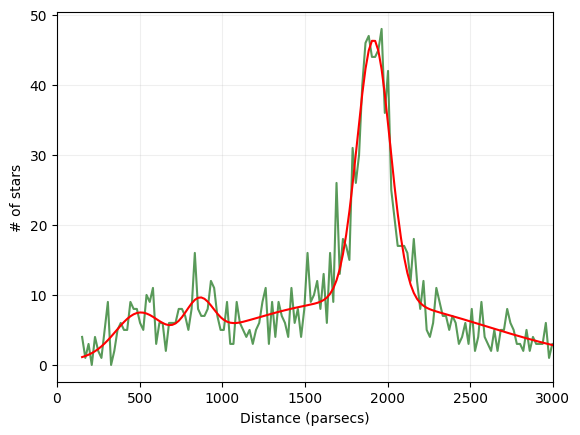

In [14]:
plx_arcmin = parallax / 1000
distance = 1/plx_arcmin

hist, bins = np.histogram(distance, bins=500, range=None, normed=None, weights=None, density=None)
bins = bins[1:]


gauss_model = models.Gaussian1D(amplitude=4, mean=1500, stddev=250)
gauss_model2 = models.Gaussian1D(amplitude=18, mean=1800, stddev=200)
gauss_model3 = models.Gaussian1D(amplitude=5, mean=500, stddev=60)
gauss_model4 = models.Gaussian1D(amplitude=15, mean=800, stddev=60)

combined_model_dist = gauss_model + gauss_model2 + gauss_model3 + gauss_model4

model_dist = fitter(combined_model_dist, bins, hist, maxiter=10000)

#%matplotlib widget
plt.figure()
plt.plot(bins, hist, color='darkgreen', alpha=0.65)
plt.plot(bins, model_dist(bins), 'r')
plt.xlim(0, 3000)
plt.ylabel("# of stars")
plt.xlabel("Distance (parsecs)")
plt.grid(alpha=0.2)

In [15]:
print(model_dist[0])
print(model_dist[1])
print(model_dist[2])
print(model_dist[3], "\n")

cov_dist = fitter.fit_info['param_cov']
err_dist = dict(zip(model_dist.param_names, np.diag(cov_dist)**0.5))
print("Uncertainties: ", err_dist)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev     
    ----------------- ------------------ -----------------
    9.214809106596855 1819.9319781152572 766.9296400288413
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
       amplitude            mean              stddev     
    ---------------- ------------------ -----------------
    37.3289029083324 1915.4791731388818 99.87528654076435
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
       amplitude            mean              stddev      
    ---------------- ------------------ ------------------
    5.40211752013648 490.85814476585307 136.79939975161804
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean            stddev     
    ----------------- ----------------- ----------------
    5.282500236333807 861.1342833438285 85

In [16]:
FWHM_dist = 2.355 * 99.91874819637628
#depth = 1/FWHM_plx
print('Depth of NGC 188 via Gaussian: {:0.3f} pcs'.format(FWHM_dist))

angle = FWHM_dec_arcmin/2/60

mean_dist = 1916.90899062992

radius = np.tan(angle)*mean_dist

print('Width of NGC 188 via trigonometry: {:0.3f} pcs \n'.format(radius))

print('Distance to NGC 188: {:0.3f} pcs'.format(mean_dist))

Depth of NGC 188 via Gaussian: 235.309 pcs
Width of NGC 188 via trigonometry: 273.196 pcs 

Distance to NGC 188: 1916.909 pcs


In [17]:
import numpy as np
mean_dist = 1916.90899062992
angle = 85.2443670
radius = np.tan(angle)*mean_dist
radius

859.1800556468733

### Proper Motion (Right Ascension)

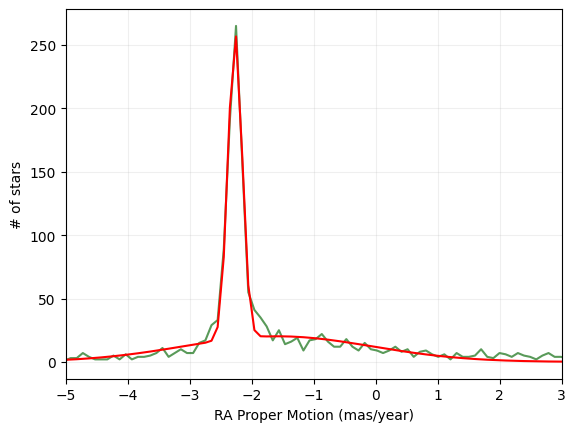

In [18]:
pm_ra = pmra[~np.isnan(pmra)]

hist, bins = np.histogram(pm_ra, bins=1000, range=None, normed=None, weights=None, density=None)
bins = bins[1:]


gauss_model = models.Gaussian1D(amplitude=150, mean= -2.5, stddev=.4)

gauss_model2 = models.Gaussian1D(amplitude=25, mean=-1.3, stddev=3.5)

gauss_model3 = models.Gaussian1D(amplitude=50, mean=-2.4, stddev=2.4)


combined_model_pmra = gauss_model + gauss_model2 + gauss_model3 

model_pmra = fitter(combined_model_pmra, bins, hist, maxiter=10000)


plt.figure()
plt.plot(bins, hist, color='darkgreen', alpha=0.65)
plt.plot(bins, model_pmra(bins), 'r')
plt.xlim(-5, 3)
plt.ylabel("# of stars")
plt.xlabel("RA Proper Motion (mas/year)")
plt.grid(alpha=0.2)

In [21]:
print(model_pmra[0])
print(model_pmra[1])
print(model_pmra[2], "\n")

'''
cov_pmra = fitter.fit_info['param_cov']
err_pmra = dict(zip(model_pmra.param_names, np.diag(cov_pmra)**0.5))
print("Uncertainties: ", err_pmra)
'''

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean               stddev      
    ------------------ ------------------- -------------------
    240.45154729795095 -2.2671569524931057 0.11321841652159602
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean              stddev      
    ------------------ ------------------- ------------------
    20.225055646816525 -1.5822979020569796 1.5264886030407925
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean                stddev        
    ------------------ ------------------- ----------------------
    5.7305070861981715 -1.0558112868243752 1.1754943508222875e-38 



'\ncov_pmra = fitter.fit_info[\'param_cov\']\nerr_pmra = dict(zip(model_pmra.param_names, np.diag(cov_pmra)**0.5))\nprint("Uncertainties: ", err_pmra)\n'

In [22]:
low = model_pmra[1].mean.value - model_pmra[1].stddev.value
high = model_pmra[1].mean.value + model_pmra[1].stddev.value
print(low, "\n")
print(high, "\n")

-3.108786505097772 

-0.05580929901618714 



In [23]:
lowstars = pm_ra[pm_ra<low]
highstars = pm_ra[pm_ra>high]

print(len(lowstars))
print(len(highstars))

210+164+317+89

183
419


780

In [25]:
FWHM_fieldpmra2 = 2.355 * model_pmra[2].stddev.value
area_fieldpmra2 = (model_pmra[2].amplitude.value * FWHM_fieldpmra2) / 0.3989

print('Number of field stars: {:0.0f}\n'.format(area_fieldpmra2))

Number of field stars: 0



In [ ]:
FWHM_pmra = 2.355 * model_pmra[0].stddev.value
area_pmra = (model_pmra[0].amplitude.value * FWHM_pmra) / 0.3989

FWHM_fieldpmra = 2.355 * model_pmra[1].stddev.value
area_fieldpmra = (model_pmra[1].amplitude.value * FWHM_fieldpmra) / 0.3989

print("According to Proper Motion in Right Ascension:\n")
print('Number of stars in NGC 188: {:0.0f}\n'.format(area_pmra))
print('Number of field stars: {:0.0f}'.format(area_fieldpmra))

### Proper Motion (Declination)

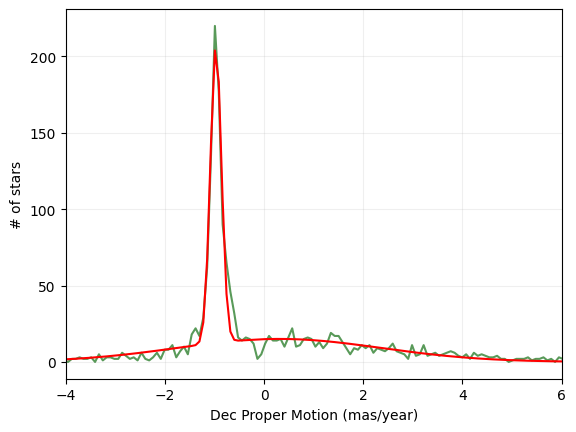

In [26]:
pm_dec = pmdec[~np.isnan(pmdec)]

hist, bins = np.histogram(pm_dec, bins=1000, range=None, normed=None, weights=None, density=None)
bins = bins[1:]


gauss_model = models.Gaussian1D(amplitude=110, mean= -0.9, stddev=1.7)

gauss_model2 = models.Gaussian1D(amplitude=20, mean=0.8, stddev=3.5)


combined_model_pmdec = gauss_model + gauss_model2

model_pmdec = fitter(combined_model_pmdec, bins, hist, maxiter=10000)


plt.figure()
plt.plot(bins, hist, color='darkgreen', alpha=0.65)
plt.plot(bins, model_pmdec(bins), 'r')
plt.xlim(-4, 6)
plt.ylabel("# of stars")
plt.xlabel("Dec Proper Motion (mas/year)")
plt.grid(alpha=0.2)

In [27]:
print(model_pmdec[0])
print(model_pmdec[1],"\n")


cov_pmdec = fitter.fit_info['param_cov']
err_pmdec = dict(zip(model_pmdec.param_names, np.diag(cov_pmdec)**0.5))
print("Uncertainties: ", err_pmdec)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean               stddev      
    ----------------- ------------------- -------------------
    194.8618986723779 -0.9703438663346139 0.11150366478665703
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ------------------ ------------------ ------------------
    15.062600800358485 0.3038385078879066 2.0592318621890033 

Uncertainties:  {'amplitude_0': 1.4707031405333661, 'mean_0': 0.0009594727859798265, 'stddev_0': 0.0009964114124791147, 'amplitude_1': 0.3564440199898344, 'mean_1': 0.055992782803042075, 'stddev_1': 0.053426264858862274}


In [28]:
FWHM_pmdec = 2.355 * model_pmdec[0].stddev.value
area_pmdec = (model_pmdec[0].amplitude.value * FWHM_pmdec) / 0.3989

FWHM_fieldpmdec = 2.355 * model_pmdec[1].stddev.value
area_fieldpmdec = (model_pmdec[1].amplitude.value * FWHM_fieldpmdec) / 0.3989

print("According to Proper Motion in Declination:\n")
print('Number of stars in NGC 188: {:0.0f}\n'.format(area_pmdec))
print('Number of field stars: {:0.0f}'.format(area_fieldpmdec))

According to Proper Motion in Declination:

Number of stars in NGC 188: 128

Number of field stars: 183


----------------

# King Model

Text(0, 0.5, '# of stars')

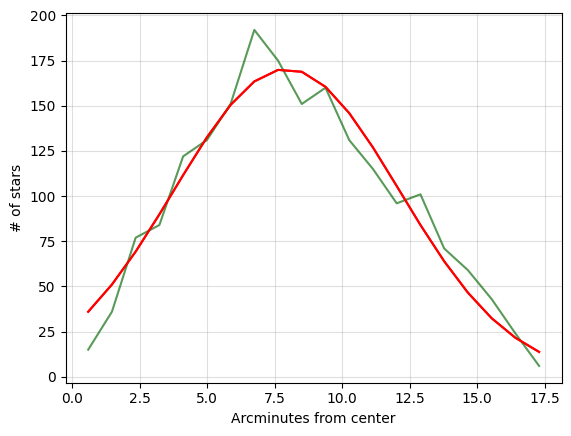

In [30]:
RA = np.array(ra)
DEC = np.array(dec)

center = SkyCoord(11.75253981560243, 85.14210601398687, unit="deg")  # defaults to ICRS frame

star_coords = []
for i in range(0, 1940, 1):
    star = SkyCoord(RA[i], DEC[i], frame="icrs", unit="deg")
    star_coords = np.append(star_coords, star)

    

separation = [] * u.deg
for k in range(0, 1940, 1):
    sep = center.separation(star_coords[k])
    separation = np.append(separation, sep)



    
hist, binedges = np.histogram(separation, bins=20, range=None, weights=None, density=None)


bincenters = np.mean(np.vstack([binedges[:-1], binedges[1:]]), axis=0)

bin_edges = binedges * 60
bin_centers = bincenters * 60


gauss_model3 = models.Gaussian1D(amplitude=20, mean=6, stddev=2.4)


combined_model_sep = gauss_model3 

model_sep = fitter(combined_model_sep, bin_centers, hist, maxiter=10000)

#%matplotlib widget
%matplotlib inline
plt.figure()
plt.plot(bin_centers, model_sep(bin_centers), 'r')



plt.plot(bin_centers, hist, color='darkgreen', alpha=0.65)
plt.plot(bin_centers, model_sep(bin_centers), 'r')
plt.grid(alpha=0.4)
plt.xlabel("Arcminutes from center")
plt.ylabel("# of stars")


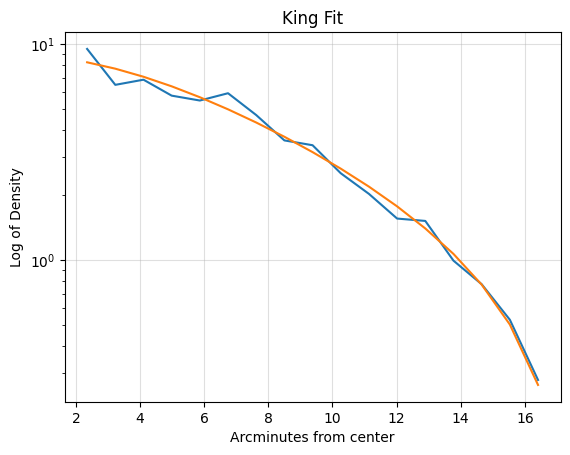

In [31]:
bin_edge = bin_edges / u.deg
densities = []
for i in range(0, len(hist)):
    
    if i == 0:
        area = np.pi*((bin_edge[i]**2) - 0)
        density = hist[i] / area
        densities = np.append(densities, density)
    else:
        area = np.pi*((bin_edge[i]**2) - (bin_edge[i-1]**2))
        density = hist[i] / area
        densities = np.append(densities, density)

bins1 = np.array(bin_centers)
bins1 = bins1[2:-1]
hist1 = np.array(densities)
hist1 = hist1[2:-1]

class King(Fittable1DModel):
    fbg = Parameter(default=1.)
    f0 = Parameter(default=1.)
    rc = Parameter(default=1.)
    
    @staticmethod
    def evaluate(r, fbg, f0, rc):
        return fbg + ((f0) / (1 + (r/rc)**2))

        
king_model = King(fbg = 6, f0 = 10, rc = 8)  
king_fit = fitter(king_model, bins1, hist1, maxiter=10000)

%matplotlib inline
plt.figure()
plt.plot(bins1, hist1)
#plt.title("Density vs. Distance from Center")
#plt.xlabel("Arcminutes from center")
#plt.ylabel("Log of Density")
plt.grid(alpha=0.4)

#plt.figure()
plt.plot(bins1, king_fit(bins1))
plt.title("King Fit")
plt.xlabel("Arcminutes from center")
plt.ylabel("Log of Density")
#plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.4)
plt.show()

In [32]:
print(king_fit)

Model: King
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
            fbg                 f0                rc       
    ------------------- ----------------- -----------------
    -2.5354235493262354 11.45790082578028 9.335072395149178


In [33]:
cov_king = fitter.fit_info['param_cov']
err_king = dict(zip(king_fit.param_names, np.diag(cov_king)**0.5))
print("Uncertainties: ", err_king)

Uncertainties:  {'fbg': 1.0481445218818621, 'f0': 0.8375725971544367, 'rc': 1.4031371746140362}


In [34]:
rc = king_fit.rc.value
#rc = 3.3766720568146558
#f0 = 17.349336982825772
f0 = king_fit.f0.value
#sigfbg = 0.4352732543004553
sigfbg = 1.048144521881862

rlim = rc * np.sqrt((f0/(3*sigfbg))-1)
print("Limiting radius: ", rlim, "arcminutes\n")
print("Limiting radius: ", rlim/60, "degress")

Limiting radius:  15.17880472971954 arcminutes

Limiting radius:  0.25298007882865897 degress


In [35]:
rc

9.335072395149178

In [36]:
print("Declination span for next Gaia search: ", 1.1 * rlim / 60, "degrees")

Declination span for next Gaia search:  0.27827808671152493 degrees


-------------------

# Membership Probabilities

In [43]:
mu_x = np.array(pmra[~np.isnan(pmra)])
mu_y = np.array(pmdec[~np.isnan(pmdec)])

N_c = 130  # 130
N_f = len(mu_x) - N_c  # 1689
N = N_c + N_f
sig_x = model_pmra[0].stddev.value  # 0.10112900401573473      units: mas/yr
sig_y = model_pmdec[0].stddev.value  # 0.11040423266139396           ^
mu_xc = model_pmra[0].mean.value  # -2.268612194347573               ^
mu_yc = model_pmdec[0].mean.value  # -0.9677117085476703             ^
ep_x = model_pmra[1].stddev.value  # 2.3883391235760056              ^
ep_y = model_pmdec[1].stddev.value  # 2.014060261001579              ^
mu_xf = model_pmra[1].mean.value  # -0.8851252296162758              ^
mu_yf = model_pmdec[1].mean.value  # 0.3025796806753427              ^


Phi_cluster = []
for i in range(0, len(mu_x)):
    phi_c = (N_c/(2*np.pi*sig_x*sig_y))*np.exp(-(((mu_x[i]-mu_xc)**2/(2*(sig_x**2)))+((mu_y[i]-mu_yc)**2/(2*(sig_y**2)))))
    Phi_cluster = np.append(Phi_cluster, phi_c)


Phi_field = []
for i in range(0, len(mu_x)):
    phi_f = (N_f/(2*np.pi*ep_x*ep_y))*np.exp(-(((mu_x[i]-mu_xf)**2/(2*(ep_x**2)))+((mu_y[i]-mu_yf)**2/(2*(ep_y**2)))))
    Phi_field = np.append(Phi_field, phi_f)
    
    
Prob = []
for i in range(0, len(mu_x)):
    prob = Phi_cluster[i] / (Phi_field[i] + Phi_cluster[i])
    Prob = np.append(Prob, prob)


C:\Users\ndepe\AppData\Local\Temp\ipykernel_192\1177292947.py:31: RuntimeWarning: invalid value encountered in double_scalars
  prob = Phi_cluster[i] / (Phi_field[i] + Phi_cluster[i])


In [40]:
import matplotlib.pyplot as plt
import astropy
from astroquery.gaia import Gaia
import numpy as np
from astropy.modeling import models, fitting
fitter = fitting.LevMarLSQFitter()
from astropy.table import Table, vstack
from scipy.stats import norm
from scipy import integrate
import matplotlib.mlab as mlab
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.modeling.models import custom_model
from astropy.modeling import Fittable1DModel, Parameter
from astroquery.sdss import SDSS
import math


# zooming in on cluster to make our lives easier
query_box_zoomed = """SELECT 
{columns}
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(
  POINT(ra, dec),
  BOX(11.97, 85.24083, 3.61699411, 0.3000936947846532))
"""
# ra span found by dec_span divided by cosine of center declination

columns = 'source_id, ra, dec, pmra, pmdec, parallax, phot_g_mean_mag, phot_bp_mean_mag'

query = query_box_zoomed.format(columns=columns)

job = Gaia.launch_job_async(query=query)

results_zoomed = job.get_results()


ra = results_zoomed['ra']
dec = results_zoomed['dec']
parallax = results_zoomed['parallax']
pmra = results_zoomed['pmra']
pmdec = results_zoomed['pmdec']
g = results_zoomed['phot_g_mean_mag']
bp = results_zoomed['phot_bp_mean_mag']

INFO: Query finished. [astroquery.utils.tap.core]


In [41]:
results_zoomed

source_id,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,phot_bp_mean_mag
,deg,deg,mas / yr,mas / yr,mas,mag,mag
int64,float64,float64,float64,float64,float64,float32,float32
573748772513933184,13.482581246066726,85.10194392668213,2.711670958186124,3.3233921673444766,1.3269001607299633,20.39757,20.640018
573748776810535808,13.540355367862732,85.10324361443429,0.017498319354742664,1.7947360931540974,0.2561727724485855,16.87154,17.212214
573748776810535936,13.558883102225808,85.09554095241272,-4.777296544948063,1.0666385555461757,0.39859110422845795,17.85813,18.306845
573749081751581184,13.691000822134791,85.10570528562205,2.3587222505663714,1.5674384966469663,0.8022828479074489,19.31735,20.084175
573749086047266688,13.677901438808531,85.10237150762553,--,--,--,20.82221,21.593206
573749086047605760,13.669940347530973,85.10660019338751,-3.7108453192855193,0.07651299309314069,0.8636104273789876,20.757387,21.364054
573749116111325824,13.714722105030352,85.11896919492233,-2.0215191336316694,1.2768926136377972,0.363836007048032,19.172146,19.619709
573749120407004800,13.688096410235987,85.1113061462748,7.683044890651358,2.2972202621420776,0.060128604900531527,20.775873,21.277016


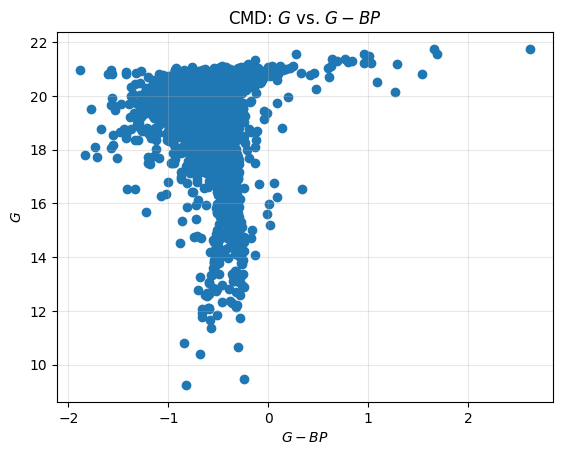

In [42]:
plt.figure()
plt.scatter(g-bp, g)
plt.title('CMD: $G$ vs. $G - BP$')
plt.xlabel('$G - BP$')
plt.ylabel('$G$')
plt.grid(alpha=0.3)
plt.savefig('CMD.png')